# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import function_variables as fv


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings

#turn off the futureproofing libraries
warnings.filterwarnings("ignore", category=UserWarning)

In [33]:
df = pd.read_csv('../data/wholesale_Data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


- Lets examine the Dataframe

In [34]:
display(df.shape)
display(df.describe())
display(df.dtypes)
display(df.info())

(440, 8)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


None

- We can see the code is looking nice at first glance, everything is an integer, no missing values however there may be some outliers so we will start looking for those next


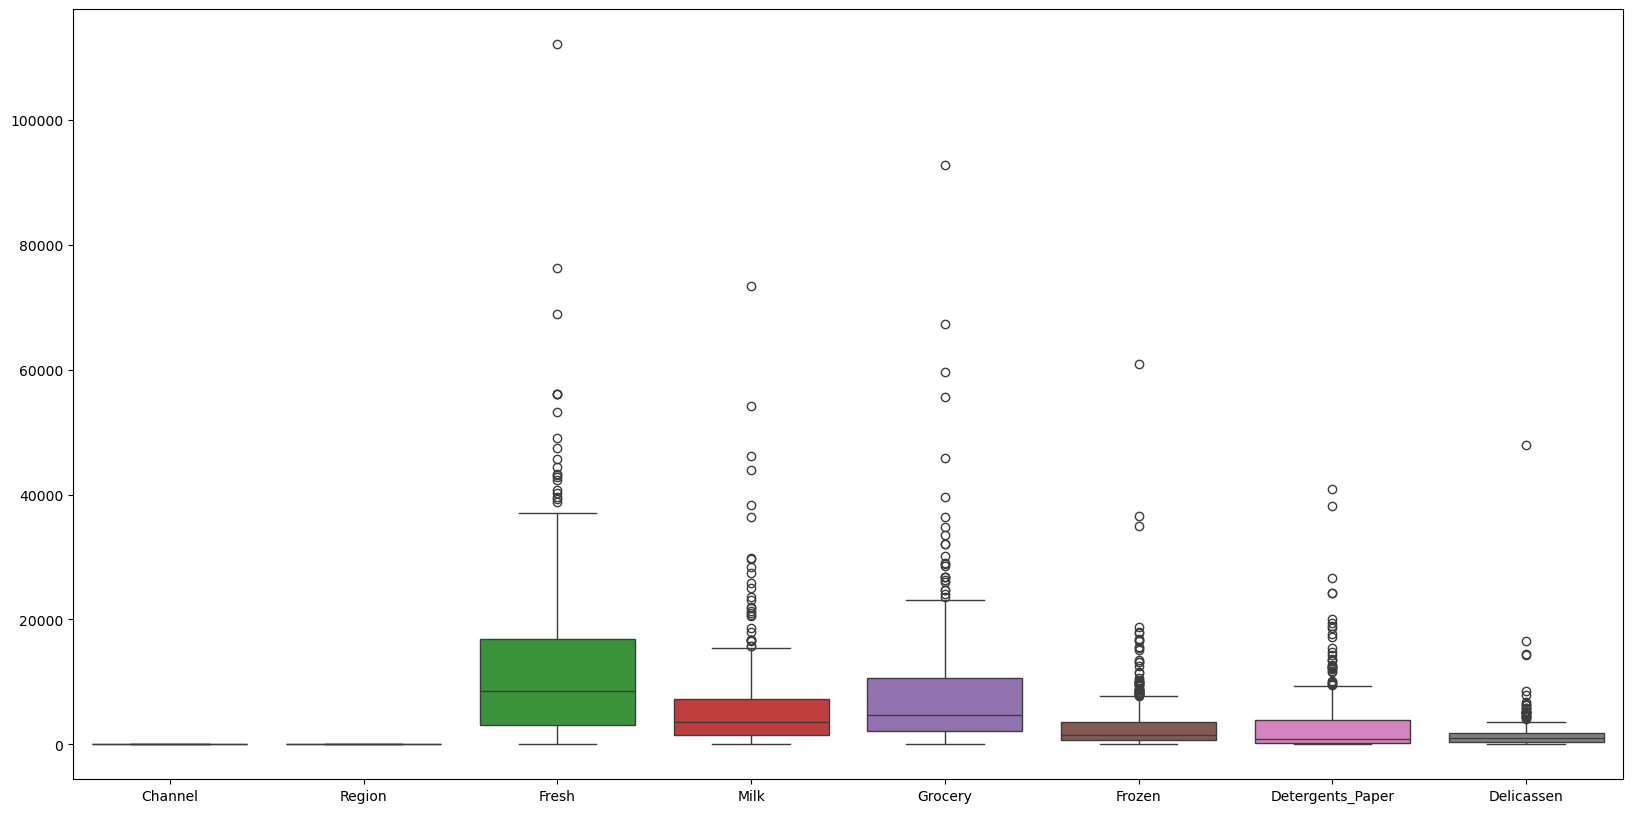

In [35]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

plt.show()

- We can see some pretty outrageous outliers, in particular we are looking at the one in fresh, grocery, milk, frozen and delicassen, lets look at the rows that contain those outliers

In [36]:
outlier_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']
max_rows = df[outlier_columns].idxmax()
df.loc[max_rows]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
181,1,3,112151,29627,18148,16745,4948,8550
86,2,3,22925,73498,32114,987,20070,903
85,2,3,16117,46197,92780,1026,40827,2944
325,1,2,32717,16784,13626,60869,1272,5609
183,1,3,36847,43950,20170,36534,239,47943


 - inspection looks like some of these values may have been entered incorrectly, we're going to drop them for now and see how the data changes

In [37]:
df = fv.delete_max_rows(df, max_rows)
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,1.321839,2.540230,11630.744828,5380.002299,7636.147126,2840.204598,2759.772414,1390.790805
std,0.467720,0.777041,11654.374150,5971.679533,8524.526125,3613.604752,4353.065698,1704.203121
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3100.000000,1520.500000,2146.500000,728.500000,256.500000,405.500000
50%,1.000000,3.000000,8258.000000,3610.000000,4740.000000,1517.000000,811.000000,961.000000
75%,2.000000,3.000000,16718.000000,7086.000000,10431.000000,3512.500000,3886.000000,1782.000000
max,2.000000,3.000000,76237.000000,54259.000000,67298.000000,35009.000000,38102.000000,16523.000000


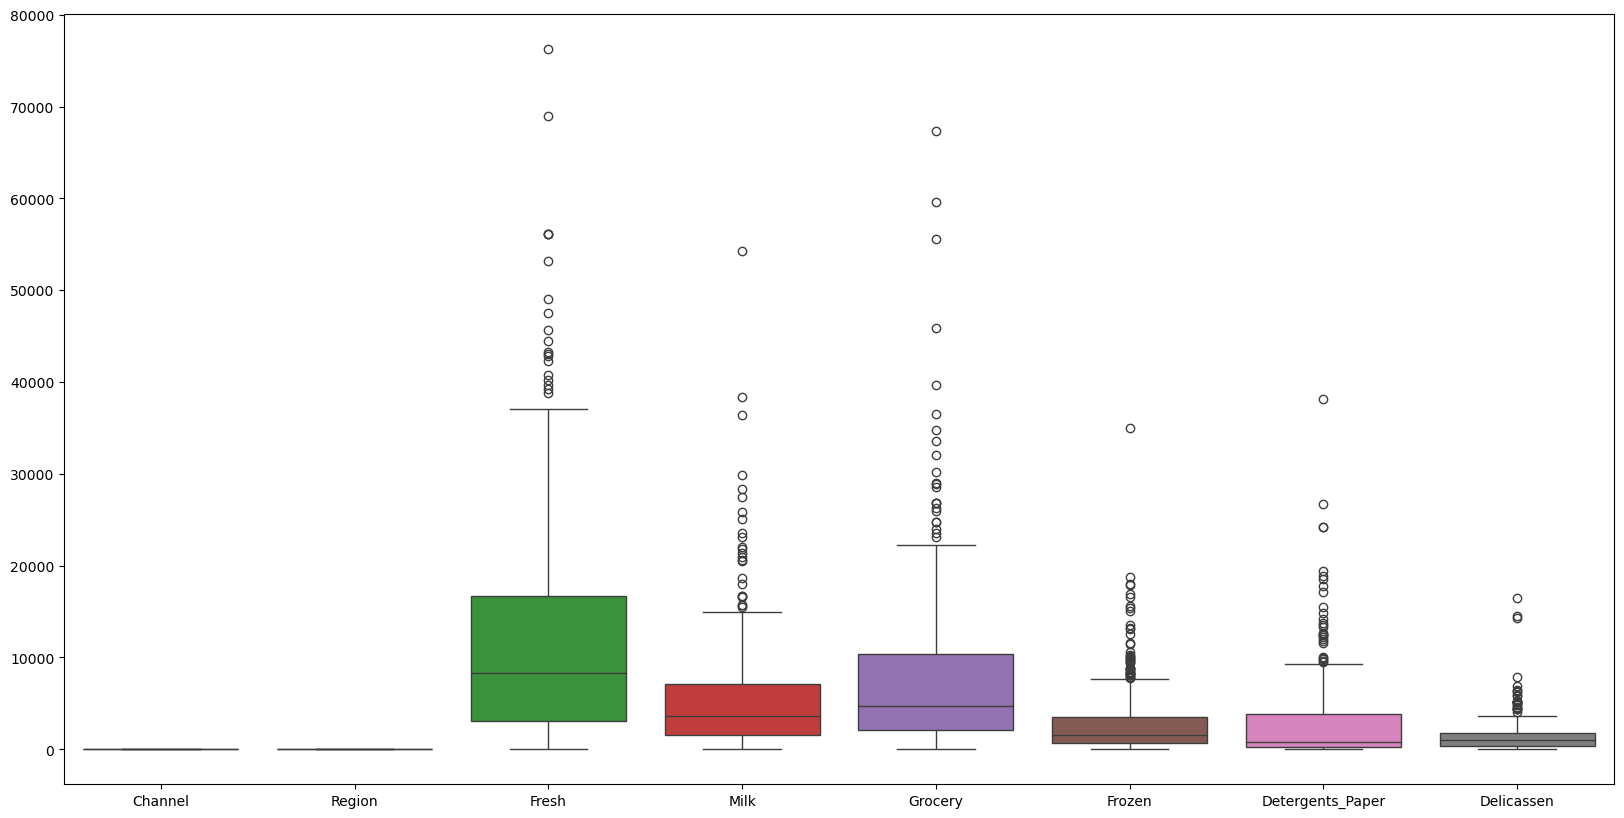

In [38]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

plt.show()

- we can see there is still a fair few outliers however not as much of a skew. although now that we have adjusted the scale on detergents_paper and frozen we can see a much bigger gap there, we might drop one more from milk, frozen, detergents_paper.

In [39]:
outlier_columns = ['Milk','Frozen', 'Detergents_Paper']
max_rows = df[outlier_columns].idxmax()
display(df.loc[max_rows])
df = fv.delete_max_rows(df, max_rows)
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
47,2,3,44466,54259,55571,7782,24171,6465
91,1,3,11314,3090,2062,35009,71,2698
328,2,2,8565,4980,67298,131,38102,1215


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,1.319444,2.539352,11562.567130,5273.083333,7399.983796,2760.571759,2634.622685,1376.425926
std,0.466802,0.778676,11586.269222,5508.347617,7710.730598,3266.187759,3884.180285,1691.313519
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3094.500000,1506.250000,2146.750000,732.750000,256.750000,405.000000
50%,1.000000,3.000000,8223.500000,3607.500000,4725.000000,1510.500000,811.000000,946.500000
75%,2.000000,3.000000,16711.500000,7080.500000,10391.000000,3477.000000,3875.750000,1777.000000
max,2.000000,3.000000,76237.000000,38369.000000,59598.000000,18711.000000,26701.000000,16523.000000


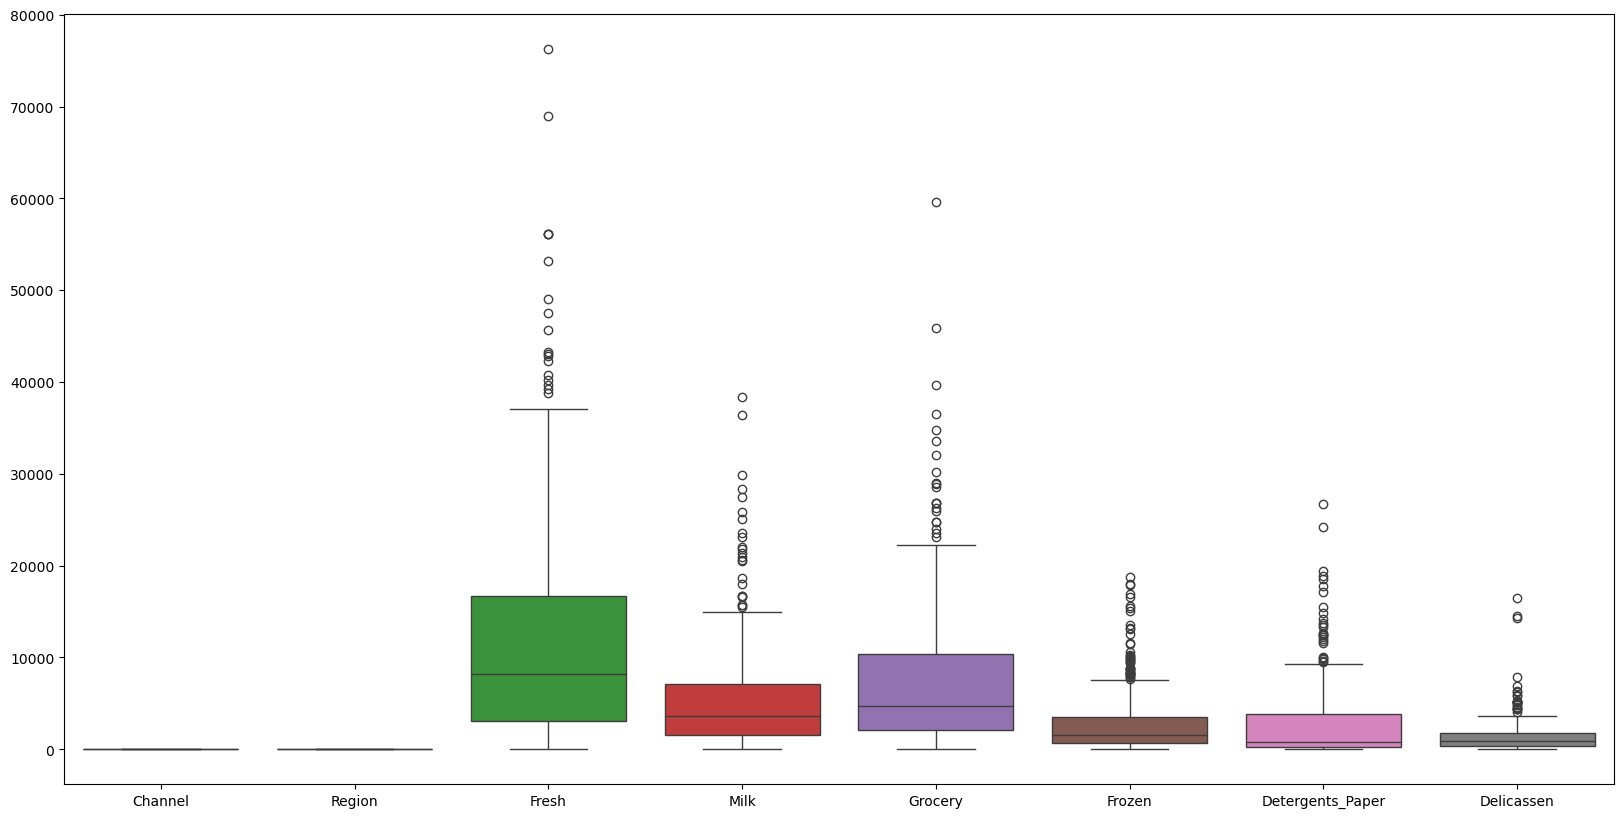

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

plt.show()


- lets split this in two so we can see better with fresh and grocery on a seperate scale 

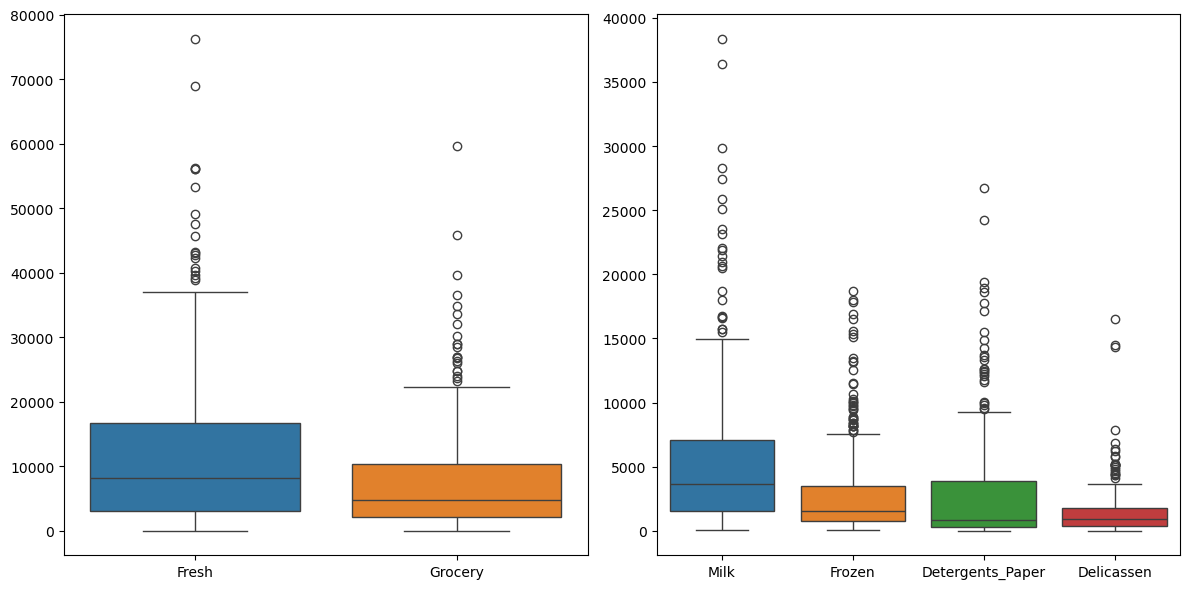

In [41]:
first_cols = ['Fresh', 'Grocery']
second_cols = ['Milk', 'Frozen', 'Detergents_Paper', 'Delicassen']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

# Box plot 1
sns.boxplot(data=df[first_cols], ax=axes[0])  # Plot on the first axes


# Box plot 2
sns.boxplot(data=df[second_cols], ax=axes[1])  # Plot on the second axes


plt.tight_layout()  # Ensures the plots don't overlap
plt.show()


- Still have outliers but none as extreme so we will move on and handle the rest of them with transformations later.

- Lets look at correlations next

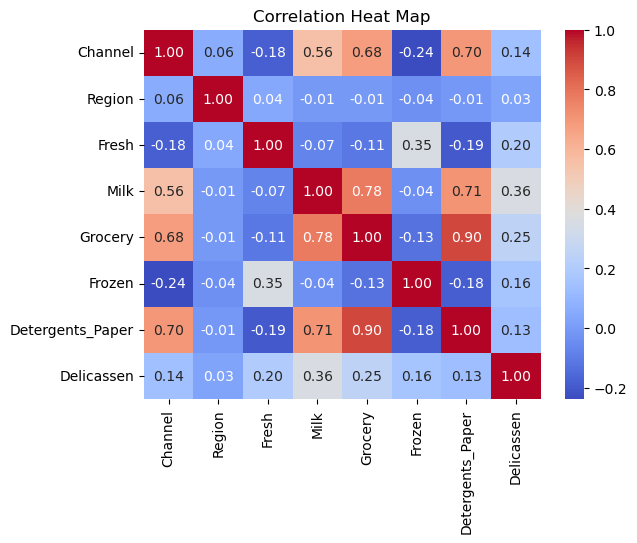

In [42]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heat Map')
plt.show()

 - We can see a few high correlation areas, Grocery/Detergents_paper being the highest but milk and grocery/detergents_paper are also quite high. we can also see that there is a noticable correlation with channel and detergents and groceries which leads me to believe that one of the channels sells significantly more of them then the other does
    - lets see some of these on scattar plots to confirm
    

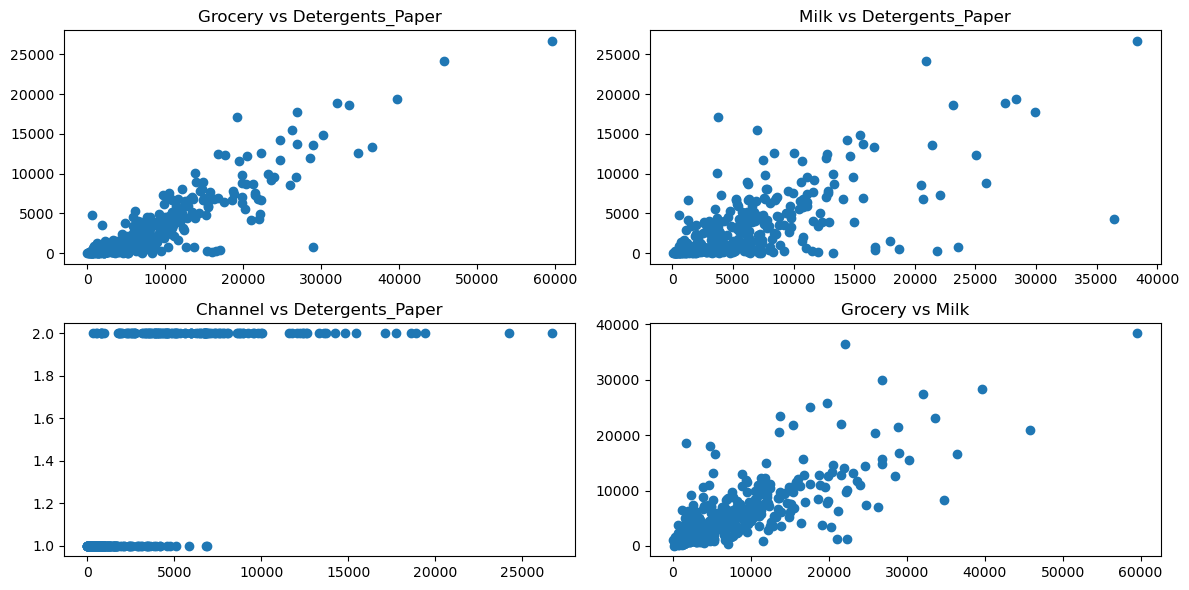

In [43]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (12,6))

axes[0,0].scatter(df['Grocery'], df['Detergents_Paper'])
axes[0,0].set_title('Grocery vs Detergents_Paper')

axes[0,1].scatter(df['Milk'], df['Detergents_Paper'])
axes[0,1].set_title('Milk vs Detergents_Paper')

axes[1,0].scatter(df['Detergents_Paper'],df['Channel'])
axes[1,0].set_title('Channel vs Detergents_Paper')

axes[1,1].scatter(df['Grocery'], df['Milk'])
axes[1,1].set_title('Grocery vs Milk')

plt.tight_layout()
plt.show()

 - We can see some pretty linear relationships going on

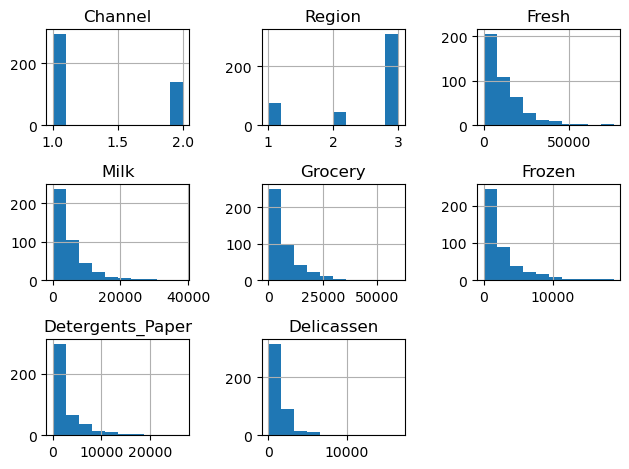

In [44]:
df.hist()
plt.tight_layout()
plt.show()

- We can see a pretty severe right skew on most of this data indicating a lot more small sales than there are large, however there have been a few large to mess with our means.
- We can also see that "Channel" and "Region" are categorical, so I'm going to stop looking at those and we will one-hot-encode them later

In [45]:
categorical_cols = ['Channel', 'Region']
numerical_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

X = fv.log_scale_encode(df,numerical_cols,categorical_cols)

df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
427,1,3,29703,12051,16027,13135,182,2204
428,1,3,39228,1431,764,4510,93,2346
429,2,3,14531,15488,30243,437,14841,1867
430,1,3,10290,1981,2232,1038,168,2125


In [46]:
X

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,0.505474,1.039560,0.477821,-1.528764,0.670797,0.439997,False,True,False,False,True
1,0.106250,1.054664,0.694446,0.157928,0.794552,0.662266,False,True,False,False,True
2,0.034551,0.951813,0.492669,0.407187,0.833497,1.828540,False,True,False,False,True
3,0.536839,-0.953758,-0.058537,1.192052,-0.316863,0.667552,True,False,False,False,True
4,0.900839,0.486541,0.432550,0.797654,0.427952,1.503454,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
427,1.086863,1.251075,1.169130,1.767830,-0.923883,0.831756,True,False,False,False,True
428,1.276647,-0.782621,-1.630533,0.911040,-1.319959,0.880772,True,False,False,False,True
429,0.599034,1.490612,1.753465,-0.958355,1.689544,0.701491,False,True,False,False,True
430,0.363568,-0.472306,-0.644715,-0.265929,-0.971200,0.803100,True,False,False,False,True


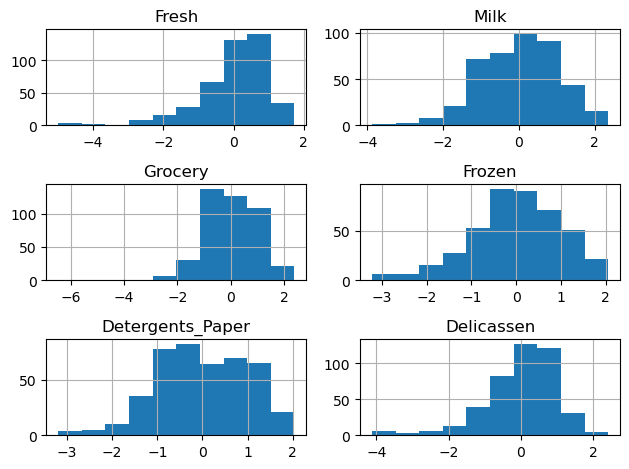

In [47]:
X[numerical_cols].hist()
plt.tight_layout()
plt.show()

- Lastly lets move on to our PCA to determine the optimal reduction for this set

In [48]:
pca = PCA()
pca.fit(X)


PCA()

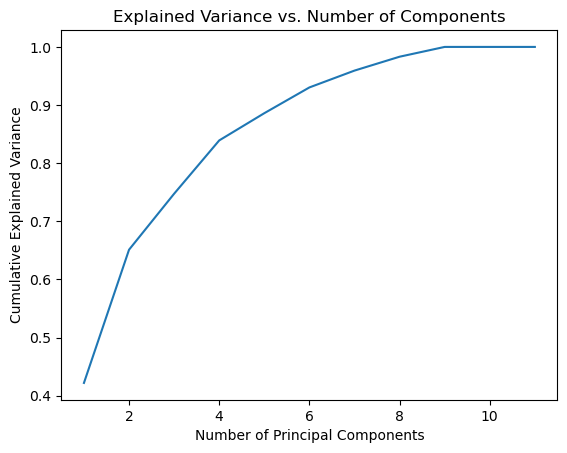

In [49]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()


plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

 - Judging by the elbow on that graph we are going with n_components = 8 for our PCA 

In [50]:
pca = PCA(n_components=8)
X = pca.fit_transform(X)


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

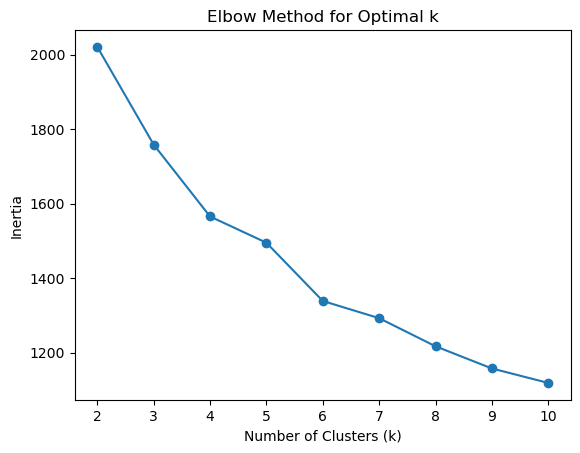

In [51]:
inertia = []
for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)  
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

-Little bit of ambiguity on this one so we will run silhoutte scores as well to determine optimal clustering

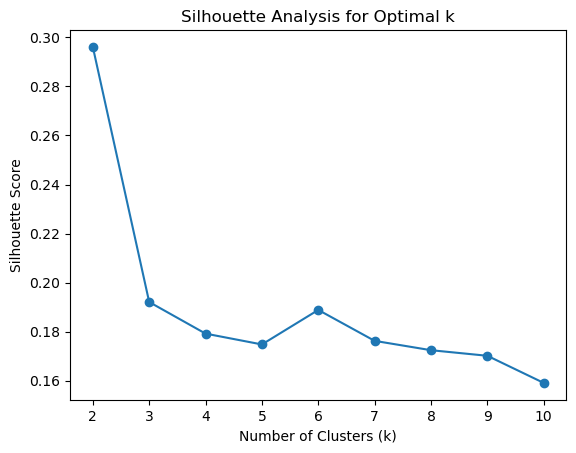

In [52]:
silhouette_scores = []
for k in range(2, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.show()

- Can pretty confidently say 2 clusters judging by the silhouette scores

In [53]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
labels = kmeans.fit_predict(X)

In [54]:
df['labels_2_clusters'] = labels
df[['Channel', 'labels_2_clusters']]

,Channel,labels_2_clusters
0,2,0
1,2,0
2,2,0
3,1,1
4,2,0
...,...,...
427,1,1
428,1,1
429,2,0
430,1,1


 - Well.. with 2 clusters we have successfully managed to make 2 seperate groups.. which line up almost perfectly with our two channels. so.. we can say yes, there are significant sales differences within those two channels
    - We're going to try that again with 4 clusters and see if we get something more interesting than information we already had.
    

In [55]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
labels = kmeans.fit_predict(X)
df['labels_4_clusters'] = labels
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_2_clusters,labels_4_clusters
0,2,3,12669,9656,7561,214,2674,1338,0,0
1,2,3,7057,9810,9568,1762,3293,1776,0,0
2,2,3,6353,8808,7684,2405,3516,7844,0,0
3,1,3,13265,1196,4221,6404,507,1788,1,2
4,2,3,22615,5410,7198,3915,1777,5185,0,0
...,...,...,...,...,...,...,...,...,...,...
427,1,3,29703,12051,16027,13135,182,2204,1,2
428,1,3,39228,1431,764,4510,93,2346,1,1
429,2,3,14531,15488,30243,437,14841,1867,0,0
430,1,3,10290,1981,2232,1038,168,2125,1,1


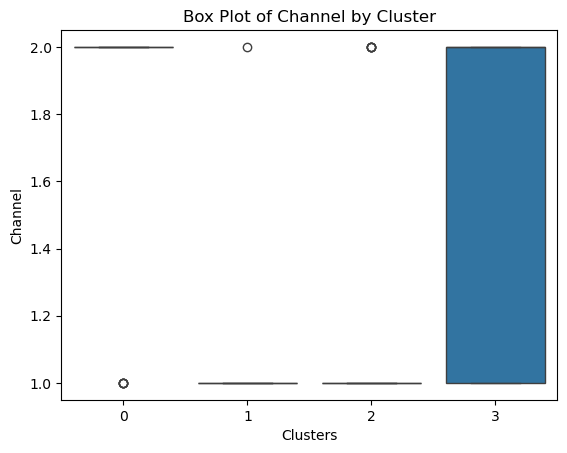

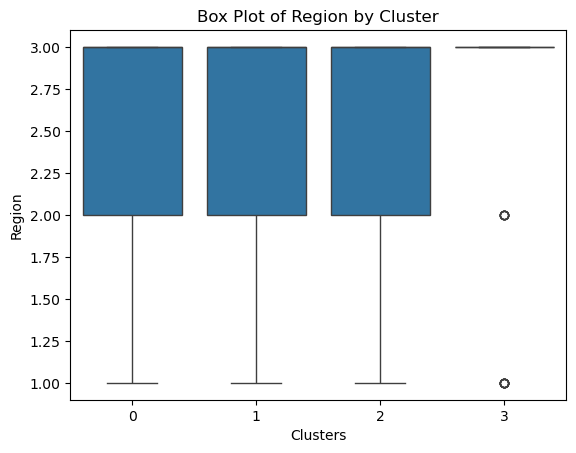

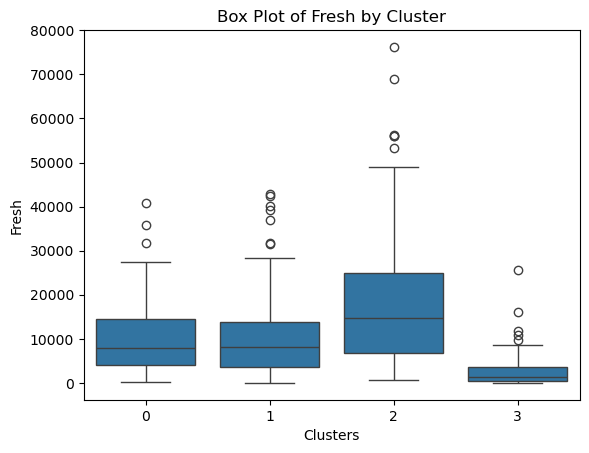

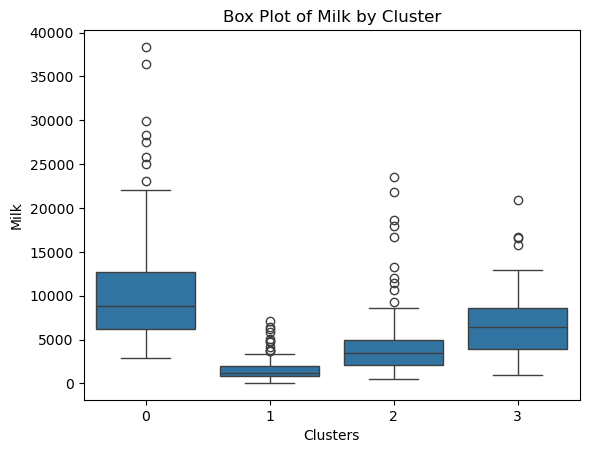

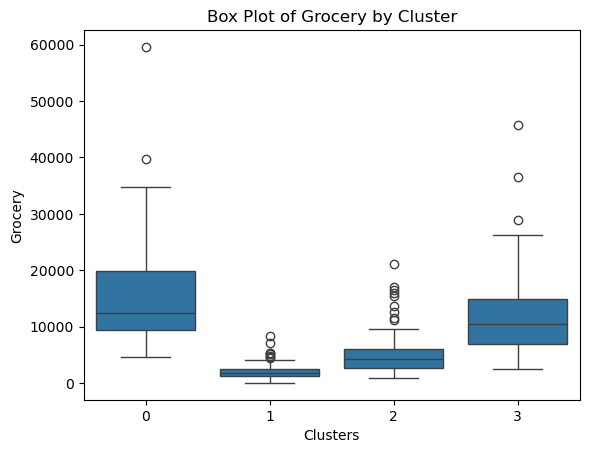

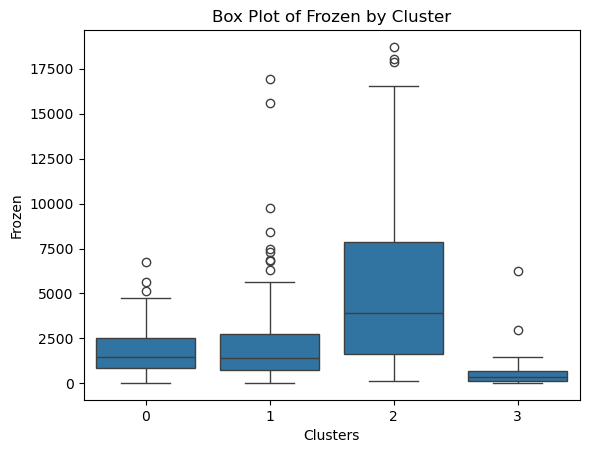

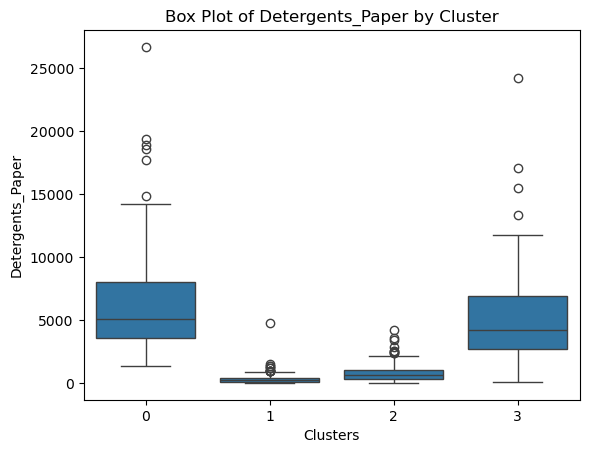

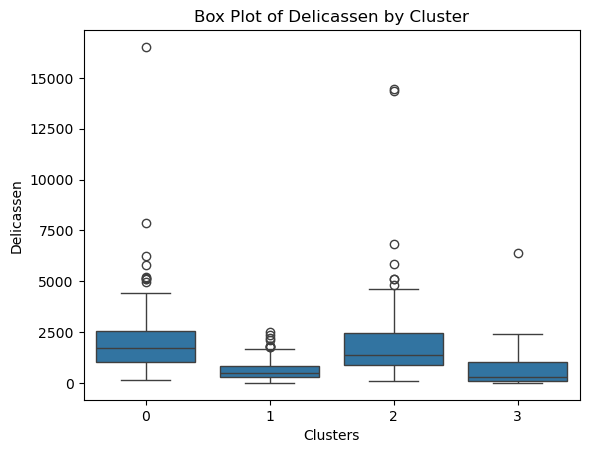

In [56]:

for column in df.columns:
    if column != 'labels_4_clusters':
        if column != 'labels_2_clusters':
            plt.figure()  # Create a new figure for each box plot
            sns.boxplot(x='labels_4_clusters', y=column, data=df)
            plt.xlabel('Clusters')
            plt.title(f'Box Plot of {column} by Cluster')
            plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

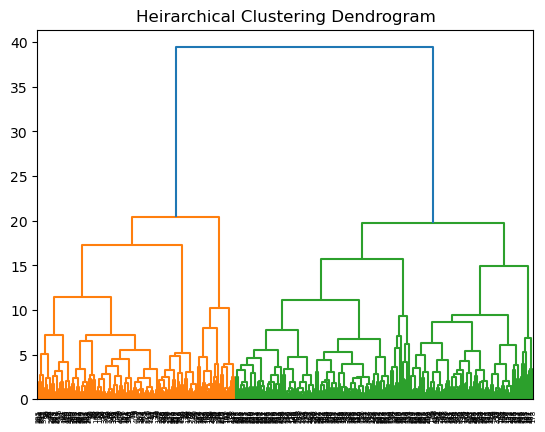

In [57]:
linked = linkage(X, method='ward')
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Heirarchical Clustering Dendrogram')
plt.show()

 - we're gonna go with t = 15 to start and see how that turns out

In [58]:
threshold = 15
labels = fcluster(linked, t=threshold, criterion='distance')
df['heirachial_labels'] = labels
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_2_clusters,labels_4_clusters,heirachial_labels
0,2,3,12669,9656,7561,214,2674,1338,0,0,6
1,2,3,7057,9810,9568,1762,3293,1776,0,0,6
2,2,3,6353,8808,7684,2405,3516,7844,0,0,6
3,1,3,13265,1196,4221,6404,507,1788,1,2,3
4,2,3,22615,5410,7198,3915,1777,5185,0,0,6


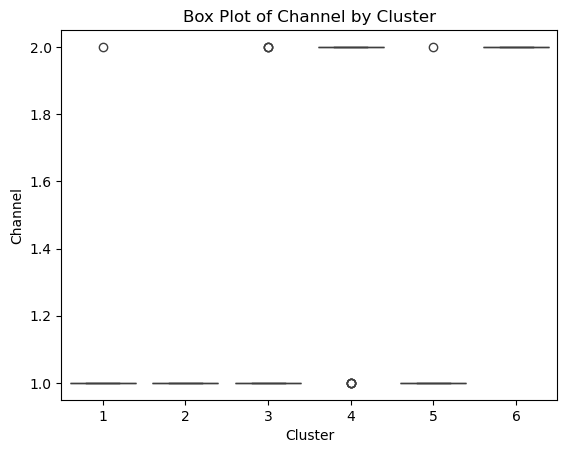

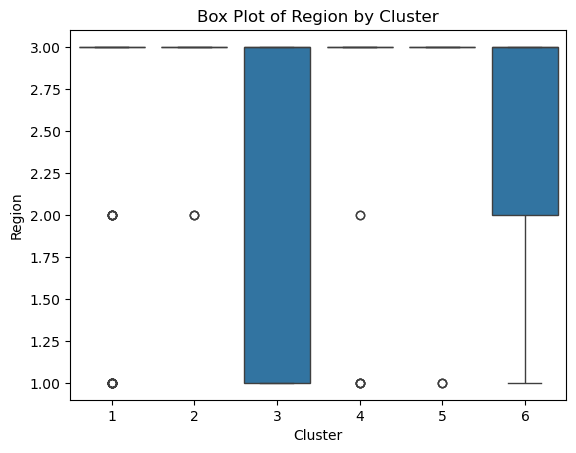

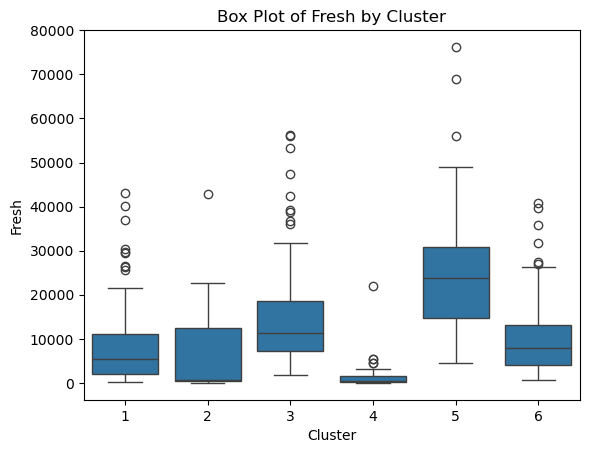

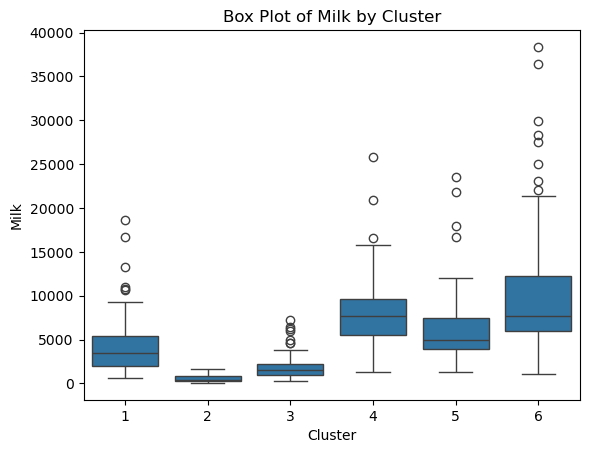

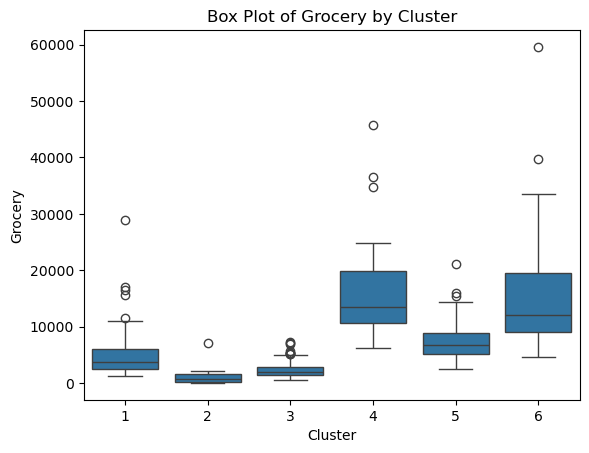

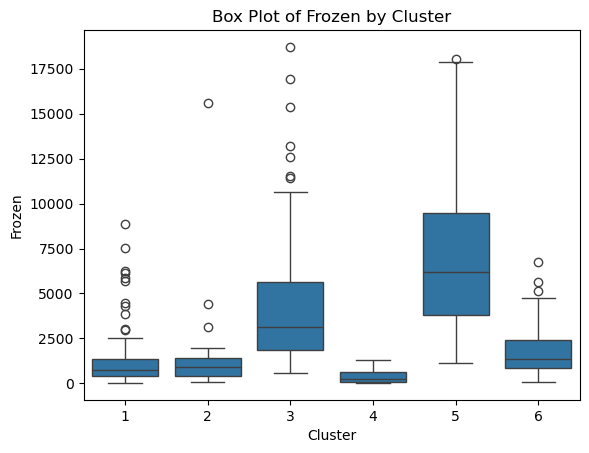

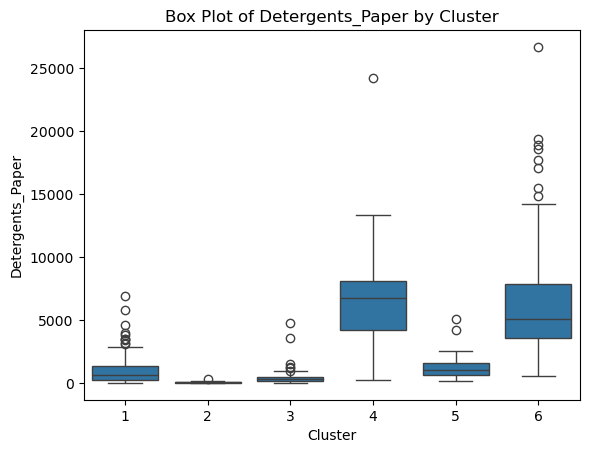

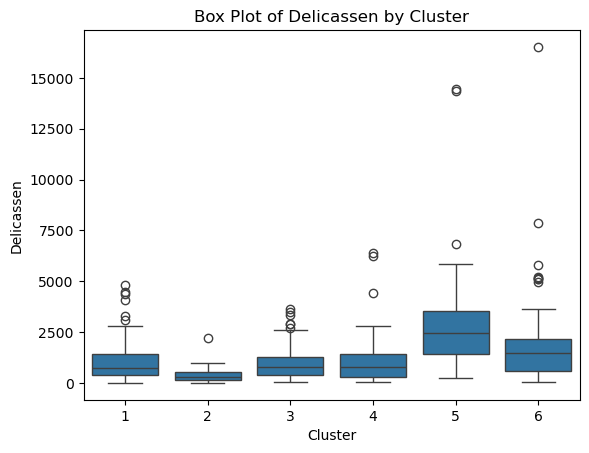

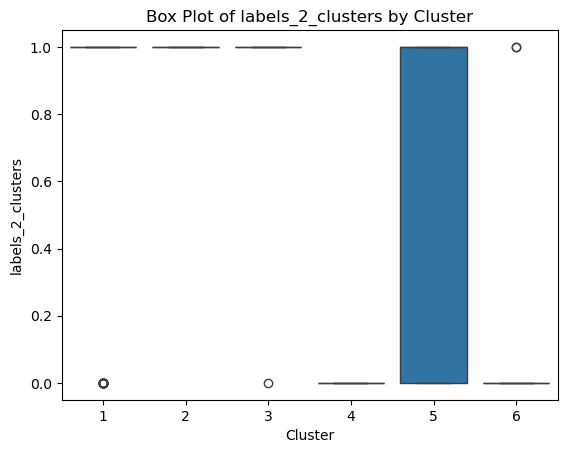

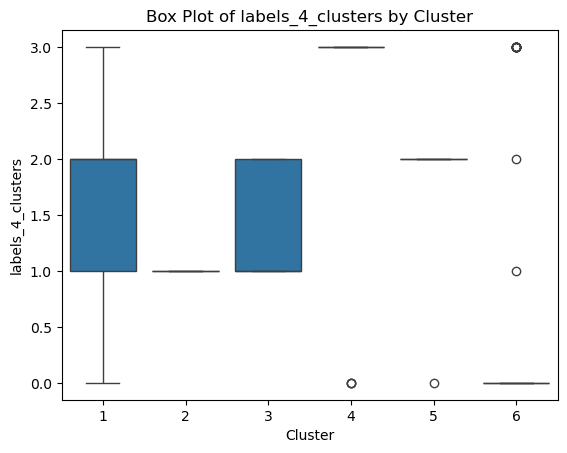

In [59]:
for column in df.columns:
    if column != 'heirachial_labels':
        plt.figure()
        sns.boxplot(x='heirachial_labels', y=column, data=df)
        plt.xlabel('Cluster')
        plt.title(f'Box Plot of {column} by Cluster')
        plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Lets perform further PCA using just the 4 clusters we aquired from the kmeans analysis

In [60]:
df_analysis = df.drop(columns=['heirachial_labels', 'labels_2_clusters'])
df_analysis.rename(columns={'labels_4_clusters': 'cluster'}, inplace = True)
df_analysis = df_analysis.sort_values('cluster')
df_analysis


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
273,2,3,17360,6200,9694,1293,3620,1721,0
107,2,3,12579,11114,17569,805,6457,1519,0
407,2,3,7842,6046,8552,1691,3540,1874,0
408,2,3,4389,10940,10908,848,6728,993,0
...,...,...,...,...,...,...,...,...,...
177,1,3,694,8533,10518,443,6907,156,3
171,2,3,2343,7845,11874,52,4196,1697,3
169,2,3,514,7677,19805,937,9836,716,3
166,2,3,260,8675,13430,1116,7015,323,3


- We're going to transform and scale each group of data seperately so we can see what columns make up the most important parts of each cluster

Cluster 0
[[-0.20281869  0.5337119   0.56516082  0.17354203  0.5521137   0.11971904
  -0.01361402  0.01361402  0.04700378  0.00518336 -0.05218714]]


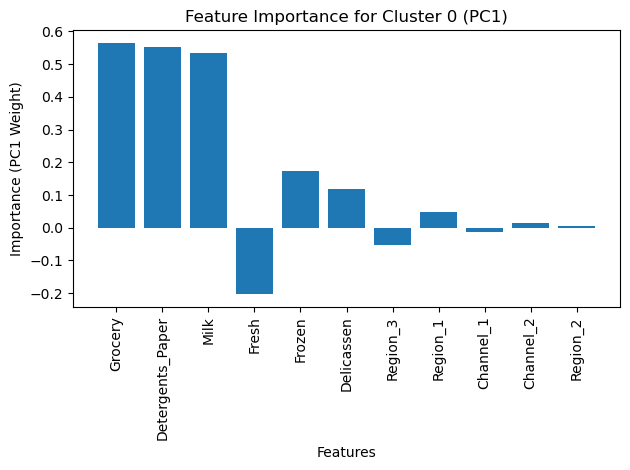

Cluster 1
[[ 0.06583305  0.56062151  0.58506417 -0.17899998  0.51684514  0.19882683
  -0.00502609  0.00502609 -0.01192064  0.01316373 -0.00124309]]


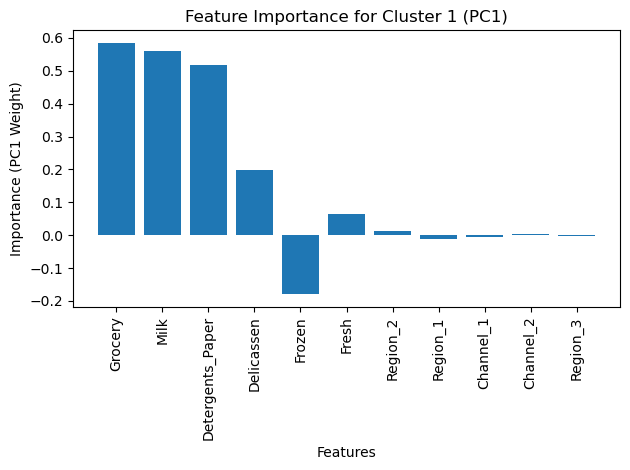

Cluster 2
[[-0.07231044  0.5310738   0.6621423  -0.13230228  0.38508215  0.31861712
  -0.0058492   0.0058492   0.04684948 -0.06602537  0.01917589]]


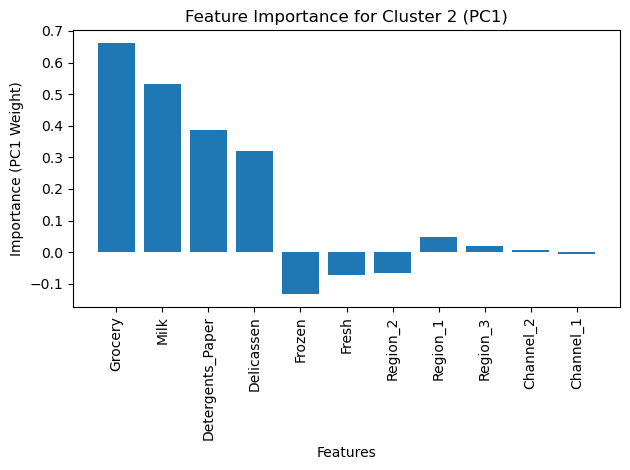

Cluster 3
[[-0.05417515  0.40131959  0.57653152 -0.06576003  0.55020045  0.31370328
  -0.22069437  0.22069437 -0.01475195  0.0219696  -0.00721764]]


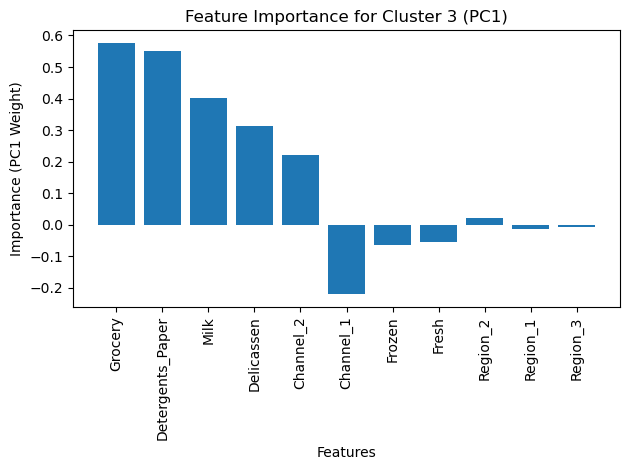

In [61]:


for cluster in df_analysis['cluster'].unique():
    cluster_data = df_analysis[df_analysis['cluster']==cluster].drop('cluster', axis=1)
    X = fv.log_scale_encode(cluster_data, numerical_cols, categorical_cols)

    pca = PCA(n_components=1)
    pca.fit(X)
    print(f'Cluster {cluster}')

    print(pca.components_)
    X_pca = pca.transform(X)

    feature_names = X.columns 
    
    feature_weights = pca.components_[0]
    # Sort features by absolute weight for better visualization
    sorted_idx = np.argsort(np.abs(feature_weights))[::-1]
    sorted_weights = feature_weights[sorted_idx]
    sorted_names = feature_names[sorted_idx]

    plt.bar(range(len(feature_names)), sorted_weights)
    plt.xticks(range(len(feature_names)), sorted_names, rotation=90) # Rotate labels
    plt.xlabel('Features')
    plt.ylabel('Importance (PC1 Weight)')
    plt.title(f'Feature Importance for Cluster {cluster} (PC1)')
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show()


# Part V - Conclusion

### From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.


##### 1. Two Primary Customer Groups:
    - Based on our dendrogram we can see a clear division down to 2 primary customer bases.

##### 2. Broken down into 4 groups:
    - We can see Channel and region don't have as much impact on creation of the different clusters at this level.
##### 3. Grocery/Milk/Detergents_Paper are highly correlated with each other:
    - We can see from our graphs directly above that the Grocery, Milk, and Detergents_Paper are highly correlated in all of the clusters
    - This means the big differences in the clusters comes from how much of the other products they are purchasing
##### 4. Examining the different clusters we can see that Delicassen and Frozen appear to be at odds:
    - Any time there is a higher positive correlation with one of those two in a group, there is a higher negative correlation with the other
        - so we can assume people buying Deli food are not buying Frozen food